In [231]:
import json

In [232]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [233]:
def dt_str(dt): return str(dt).split('.')[1]

In [234]:
basedir = "./direc58/"

In [235]:
with open(f"{basedir}/state_params.json", "r") as f:
    state_params = json.load(f)

In [236]:
state_params

{'J': 1.0,
 'hx': 1.0341455,
 'hz': 0.005,
 'J2': 0.0,
 'J3': 0.0,
 'J4': 0.0,
 'J5': 0.0,
 'hzx': 0.0,
 'D': 40,
 'vac_tol': 1e-10,
 'N': 1200,
 'ortho_2p': True,
 'symmB': False,
 'pkt_numsites': 590,
 'pkt_sigma': 100,
 'pkt_midpt': 295,
 'pad_mid': 0,
 'pad_out': 0,
 'momentum': 0.1381,
 'ex_lvl': 0}

## Plot dispersion from `save_spec`
Requires that `python master.py save_spec` has been run in `basedir`.

In [237]:
Es = np.load(f"{basedir}/vac_out_scalar_spec.npy")
ps = np.load(f"{basedir}/vac_out_scalar_spec_ps.npy")
foo = np.load(f"{basedir}/state_info.npy")
print("Correlation length =", np.round(foo[2],4)) 

Correlation length = (7.8288+0j)


In [238]:
# works after `python master.py prep_pkts` has run
E_psi = np.sum(np.load(f"{basedir}/initial_state_es.npy"))
E_psi/Es[0][0] # Need to be 3 for tests now. 
E_needed = Es[0][0]*1.50 
print (E_needed, E_psi/Es[0][0])

0.37766496132772875 2.9982637727701014


Mom needed 0.1208304866765305 for energy 0.35168213084387645
Mom needed 0.16110731556870733 for energy 0.4129128294785325
[array([0.        , 0.04027683, 0.08055366, 0.12083049, 0.16110732,
       0.20138414, 0.24166097, 0.2819378 , 0.32221463, 0.36249146,
       0.40276829, 0.44304512, 0.48332195, 0.52359878, 0.5638756 ,
       0.60415243, 0.64442926, 0.68470609, 0.72498292, 0.76525975,
       0.80553658, 0.84581341, 0.88609024, 0.92636706, 0.96664389,
       1.00692072, 1.04719755, 1.08747438, 1.12775121, 1.16802804,
       1.20830487, 1.2485817 , 1.28885852, 1.32913535, 1.36941218,
       1.40968901, 1.44996584, 1.49024267, 1.5305195 , 1.57079633])]


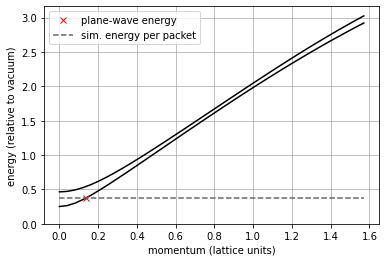

In [239]:
plt.plot(ps, Es[:, 0], "k")
plt.plot(ps, Es[:, 1], "k")

p = state_params["momentum"]
E = np.interp(p, ps, Es[:, state_params["ex_lvl"]])
#print (Es[:,0], ps)

for i in range (10):
    diff = Es[i,0]- E_needed 
    if abs(diff) < 0.04:
        print ("Mom needed", ps[i], "for energy", Es[i,0])
    
print ([ps])
plt.plot([p], [E], "rx", label="plane-wave energy")


plt.plot([ps[0], ps[-1]], [E_psi/2] * 2, "--", color="0.4", label="sim. energy per packet")
#print ([E_psi/2])

plt.xlabel("momentum (lattice units)")
plt.ylabel("energy (relative to vacuum)")
plt.ylim(ymin=0)
plt.legend()
plt.grid()

## Load a simulation

In [240]:
Dmax = 64
dt = 0.05
integrator = "RK4"

In [241]:
simdir = f"{basedir}/maxD{Dmax}_dt{dt_str(dt)}{integrator}/"
simdir

'./direc58//maxD64_dt05RK4/'

## Spin expectation values

In [242]:
# saved for every time step, including 0.
spins = np.load(f"{simdir}/expvals_evo.npy")

In [243]:
spins.shape

(6901, 1202)

In [244]:
# the last time stored
(len(spins) - 1) * dt

345.0

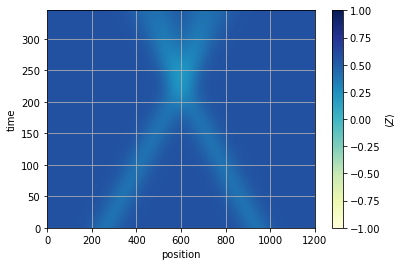

In [245]:
plt.imshow(
    spins,
    cmap="YlGnBu", #  # RdBu
    vmin=-1, vmax=1,
    origin='lower',
    aspect='auto',
    #interpolation='nearest',
    extent=(-0.5, len(spins[0])-0.5, -dt/2, dt * (len(spins) - 0.5))  # labels point to middle of pixels
)
plt.grid()
plt.xlabel("position")
plt.ylabel("time")
plt.colorbar(label="$\\langle Z \\rangle$")
# Change cmap options: https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html


<ipython-input-246-47a21f1d34e6>:2: RuntimeWarning: divide by zero encountered in log10
  np.log10(abs(spins - spins[0,0])),


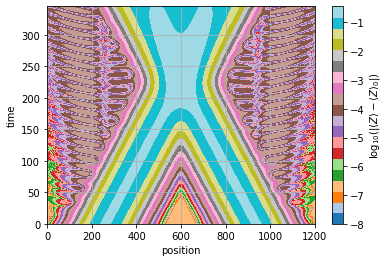

In [246]:
plt.imshow(
    np.log10(abs(spins - spins[0,0])),
    cmap="tab20",
    vmin=-8,
    origin='lower',
    aspect='auto',
    #interpolation='nearest',
    extent=(-0.5, len(spins[0])-0.5, -dt/2, dt * (len(spins) - 0.5))  # labels point to middle of pixels
)
plt.grid()
plt.xlabel("position")
plt.ylabel("time")
plt.colorbar(label="$\\log_{10}(|\\langle Z \\rangle - \\langle Z \\rangle_0|)$")

## Cut entropy

In [247]:
# As spins
entrs = np.load(f"{simdir}/entropies_evo.npy")
entrs.shape

(6901, 1202)

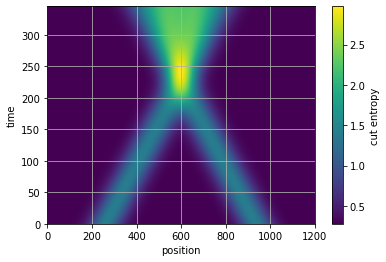

In [248]:
plt.imshow(
    entrs,
    cmap="viridis",
    origin='lower',
    aspect='auto',
    #interpolation='nearest',
    extent=(-1, len(entrs[0])-1, -dt/2, dt * (len(entrs) - 0.5))  # labels point to middle of pixels
)
plt.grid()
plt.xlabel("position")
plt.ylabel("time")
plt.colorbar(label="cut entropy")

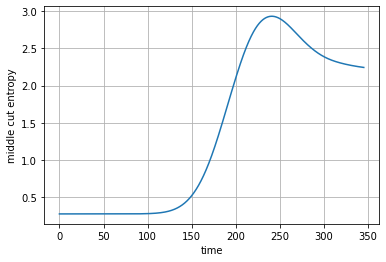

In [249]:
plt.plot(dt * np.arange(len(entrs)), entrs[:, state_params["pkt_numsites"]])
plt.xlabel("time")
plt.ylabel("middle cut entropy")
plt.grid()

## Energy density

In [250]:
# As spins
energies = np.load(f"{simdir}/energies_evo.npy")
energies.shape

(6901, 1202)

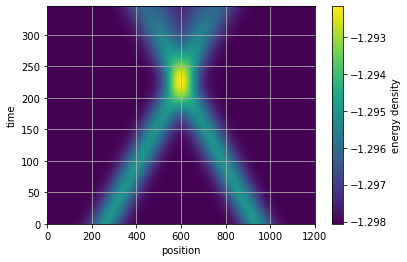

In [251]:
plt.imshow(
    energies,
    cmap="viridis",
    origin='lower',
    aspect='auto',
    #interpolation='nearest',
    extent=(-0.5, len(entrs[0])-0.5, -dt/2, dt * (len(entrs) - 0.5))  # labels point to middle of pixels
)
plt.grid()
plt.xlabel("position")
plt.ylabel("time")
plt.colorbar(label="energy density")

## Energy current

In [252]:
# As spins
encurrs = np.load(f"{simdir}/encurrs_evo.npy")
encurrs.shape

(6901, 1202)

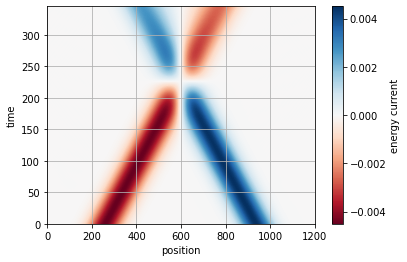

In [253]:
plt.imshow(
    encurrs,
    cmap="RdBu",
    origin='lower',
    aspect='auto',
    #interpolation='nearest',
    extent=(-0.5, len(entrs[0])-0.5, -dt/2, dt * (len(entrs) - 0.5))  # labels point to middle of pixels
)
plt.grid()
plt.xlabel("position")
plt.ylabel("time")
plt.colorbar(label="energy current")